## WEEK-2 Assignment
Fill the missing places wherever TO DO is mentioned and also understnad what has been done properly


**Also give explanation about each graph and what all you understood about it by adding a text cell below the respective graph**

Do not use Chatgpt . It is a simple assignment. Make a copy of this colab notebook and do your changes and submit it as `Assignment2_yourrollno.ipnyb`


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:

TICKERS = ["RELIANCE.NS", "TCS.NS", "HDFCBANK.NS"] #you can choose assets of your own wish

df = yf.download(TICKERS, period="3y")
prices = df.xs("Close", axis=1, level=0)

prices = prices.fillna(method="ffill").dropna()
prices.head()


/tmp/ipython-input-4023598879.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKERS, period="3y")
[*********************100%***********************]  3 of 3 completed
/tmp/ipython-input-4023598879.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  prices = prices.fillna(method="ffill").dropna()


Ticker,HDFCBANK.NS,RELIANCE.NS,TCS.NS
Date,,,
2022-12-23,768.737671,1142.245850,2955.803223
2022-12-26,784.038757,1152.220215,2978.280518
2022-12-27,784.832764,1161.646973,2984.323242
2022-12-28,784.207153,1161.532837,2982.126953
2022-12-29,789.740601,1161.007812,2992.792969


In [ ]:
log_returns = np.log(prices/prices.shift(1))           #TO DO : calculate log return
log_returns.head()


Ticker,HDFCBANK.NS,RELIANCE.NS,TCS.NS
Date,,,
2022-12-23,NaN,NaN,NaN
2022-12-26,0.019709,0.008694,0.007576
2022-12-27,0.001012,0.008148,0.002027
2022-12-28,-0.000797,-0.000098,-0.000736
2022-12-29,0.007031,-0.000452,0.003570


In [ ]:
TRADING_DAYS = 252
mu = log_returns.mean()*TRADING_DAYS                   #TO DO : Calculate Expected return (annual)
cov_matrix =log_returns.cov()*TRADING_DAYS              #TO DO : Calculate Covariance matrix

mu, cov_matrix


(Ticker
 HDFCBANK.NS    0.088285
 RELIANCE.NS    0.108324
 TCS.NS         0.038490
 dtype: float64,
 Ticker       HDFCBANK.NS  RELIANCE.NS    TCS.NS
 Ticker                                         
 HDFCBANK.NS     0.034536     0.013542  0.005236
 RELIANCE.NS     0.013542     0.039910  0.010947
 TCS.NS          0.005236     0.010947  0.038554)

In [ ]:
# step controls how finely we explore the portfolio weight space.
# step = 0.02 means weights change in increments of 2%:
# 0.00, 0.02, 0.04, ..., 1.00
# Smaller step  -> more portfolios -> higher accuracy -> slower computation
# Larger step  -> fewer portfolios -> faster but coarser approximation
step = 0.02  # You can consider some other step sizes too
weights = []   # This list will store all VALID portfolios. Each portfolio is a vector: [w1, w2, w3]


# Loop over possible values of weight for Asset 1
for w1 in np.arange(0, 1 + step, step):
    # For each w1, loop over possible values of weight for Asset 2
    for w2 in np.arange(0, 1 + step, step):
        w3 = 1-(w1+w2)                        # TO DO : What should be w3 in terms of w1 and w2 (Budget constraint)
        if w3>=0 and w1>=0 and w2>=0:                      # TO DO : what should be the condition for the if statement so that it satisfies long-only constraint Change the tru to ypur condition
            weights.append([w1, w2, w3])

weights = np.array(weights)
#TO DO : print the no. of feasible portfolios


In [ ]:
# Lists to store portfolio returns and volatility
portfolio_returns = []
portfolio_volatility = []


# Loop over every feasible portfolio weight vector
for w in weights:
    ret = np.dot(w,mu)                          # TO DO : Calculate return of Portfolio
    var =np.dot(w.T, np.dot(cov_matrix, w))                       # TO DO : Calculate Volatility

    portfolio_returns.append(ret)
    portfolio_volatility.append(np.sqrt(var))

portfolio_df = pd.DataFrame(weights, columns=["w1", "w2", "w3"])
portfolio_df["Return"] = portfolio_returns
portfolio_df["Volatility"] = portfolio_volatility

portfolio_df.head()


,w1,w2,w3,Return,Volatility
0,0.0,0.00,1.00,0.038490,0.196352
1,0.0,0.02,0.98,0.039886,0.193578
2,0.0,0.04,0.96,0.041283,0.190882
3,0.0,0.06,0.94,0.042680,0.188268
4,0.0,0.08,0.92,0.044076,0.185739


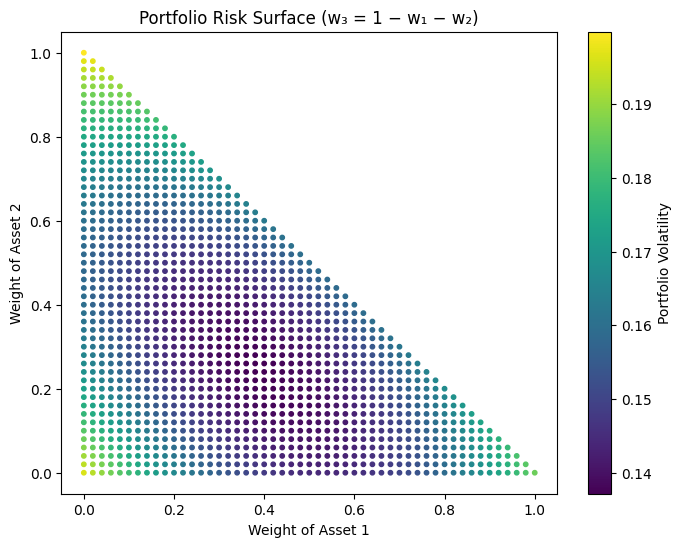

In [ ]:
#Visualization for Risk Surface
plt.figure(figsize=(8,6))
sc = plt.scatter(
    portfolio_df["w1"],
    portfolio_df["w2"],
    c=portfolio_df["Volatility"],
    cmap="viridis",
    s=10
)

plt.colorbar(sc, label="Portfolio Volatility")
plt.xlabel("Weight of Asset 1")
plt.ylabel("Weight of Asset 2")
plt.title("Portfolio Risk Surface (w₃ = 1 − w₁ − w₂)")
plt.show()


Here we can see the grah between weight of asset 1 and weight of asset 2 . We can see that they are linearly related as w1+w2+w3 must be equal to 1. We can also see that the volatility of portfolio is depicted with help of colour. we can see as we increase weight of either asset 1 , 2 or 3 the volatility increases while when we diversify and invest in all of them the volatility decreases.

In [ ]:
min_var_idx = portfolio_df["Volatility"].idxmin()                          # TO DO : Discover the Minimum Variance Portfolio
min_var_portfolio = portfolio_df.iloc[min_var_idx]                    #To Do : Fill this

min_var_portfolio


,842
w1,0.400000
w2,0.240000
w3,0.360000
Return,0.075168
Volatility,0.137189


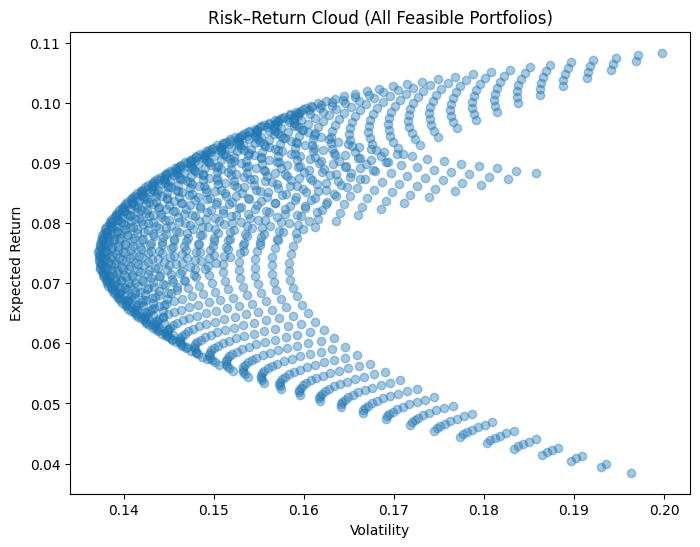

In [ ]:
# Risk-Return for all Portfolios (Visualization)
plt.figure(figsize=(8,6))
plt.scatter(
    portfolio_df["Volatility"],
    portfolio_df["Return"],
    alpha=0.4
)

plt.xlabel("Volatility")
plt.ylabel("Expected Return")
plt.title("Risk–Return Cloud (All Feasible Portfolios)")
plt.show()


The graph represents the risk return cloud. We can see the expected return and volatility for all possible portfolios. The 3 tips represent what happens when you invest all in one asset. Most portfolios are inefficient as you can get higer return for same risk with another portfolio.

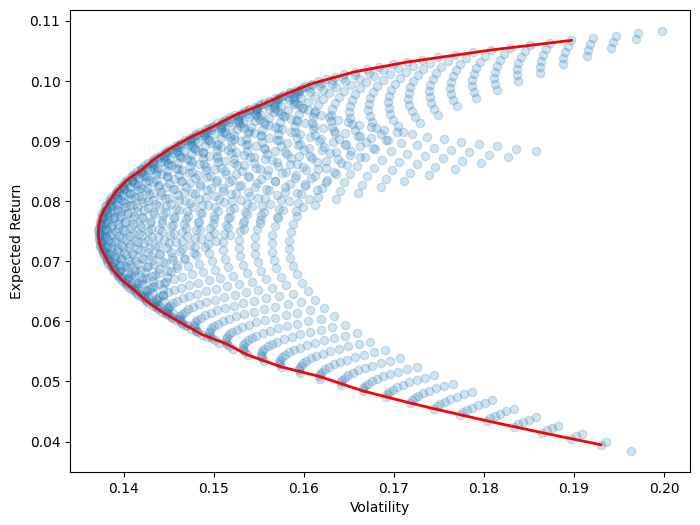

In [ ]:
# To DO: Study about the red line what is it called and what it signifies
bins = np.linspace(
    portfolio_df["Return"].min(),
    portfolio_df["Return"].max(),
    40
)

frontier_risk = []
frontier_return = []

for i in range(len(bins)-1):
    mask = (portfolio_df["Return"] >= bins[i]) & (portfolio_df["Return"] < bins[i+1])
    subset = portfolio_df[mask]

    if len(subset) > 0:
        min_row = subset.loc[subset["Volatility"].idxmin()]
        frontier_risk.append(min_row["Volatility"])
        frontier_return.append(min_row["Return"])

plt.figure(figsize=(8,6))
plt.scatter(portfolio_df["Volatility"], portfolio_df["Return"], alpha=0.2)
plt.plot(frontier_risk, frontier_return, color="red", linewidth=2)
plt.xlabel("Volatility")
plt.ylabel("Expected Return")
plt.show()


The red line in the graph represents the best possible portfolios , as you can see you cannot get a higher return for the same risk . It is called the efficient frontier.

In [ ]:
# Controlled stress test on diversification
# Increase covariance to simulate higher correlation. This mimics market stress where assets move together
stressed_cov = cov_matrix.copy()                # TO DO : Create a copy of the original covariance matrix

for i in range(len(stressed_cov)):
    for j in range(len(stressed_cov)):
        if i != j:
            stressed_cov.iloc[i, j] *= 2    # Can change the factor from 2 to any other no. too. Try chaging to diff values


In [ ]:
# List to store portfolio volatility after correlation stress
stressed_volatility = []

for w in weights:
    var = np.dot(w.T, np.dot(stressed_cov, w))                           #TO DO :  Calculate Portfolio variance under stressed covariance
    stressed_volatility.append(np.sqrt(var))

portfolio_df["Stressed Volatility"] = stressed_volatility


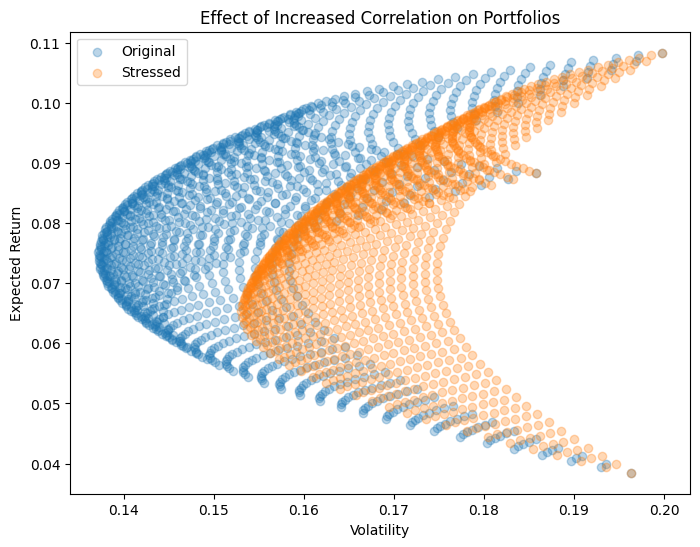

In [ ]:
#TO DO : Study this graph. It represents two conditions one with normal corr and one with stressed corr
plt.figure(figsize=(8,6))

plt.scatter(
    portfolio_df["Volatility"],
    portfolio_df["Return"],
    alpha=0.3,
    label="Original"
)

plt.scatter(
    portfolio_df["Stressed Volatility"],
    portfolio_df["Return"],
    alpha=0.3,
    label="Stressed"
)

plt.xlabel("Volatility")
plt.ylabel("Expected Return")
plt.title("Effect of Increased Correlation on Portfolios")
plt.legend()
plt.show()


In this graph, the original cloud represents portfolios under normal conditions, where assets move independently, allowing diversification to lower overall risk. The stressed cloud, created by increasing the covariance between assets, shifts significantly to the right, showing that when assets become more highly correlated , the portfolio's volatility increases for the same level of expected return. This shift signifies that the "risk-reduction" benefit of holding multiple stocks is weakened, as the assets begin to move in same direction, effectively raising the minimum risk floor of the entire portfolio


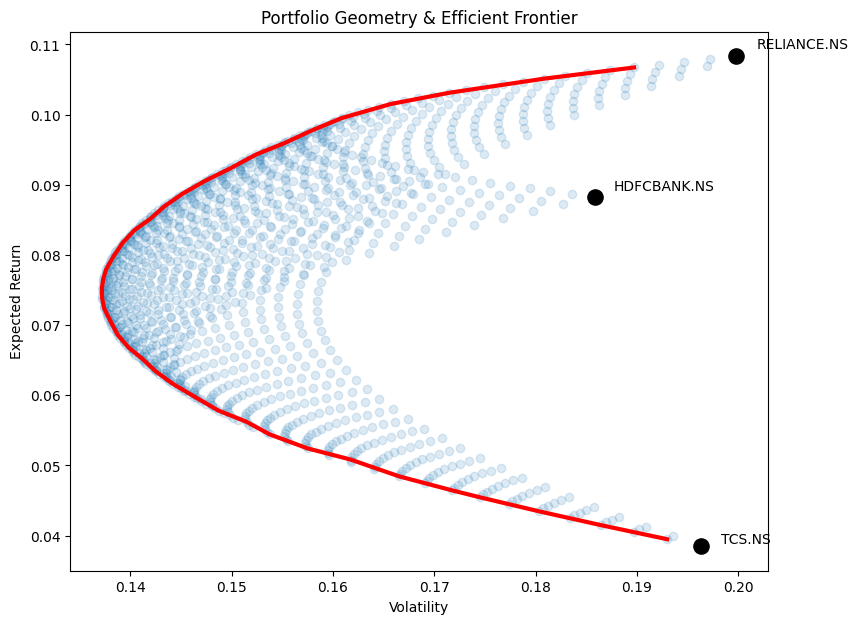

In [ ]:
asset_vol = pd.Series(np.sqrt(np.diag(cov_matrix)), index=mu.index)                       # TO DO : Compute individual asset volatility (annualized)

#Visualization
#TO DO : study this graph
plt.figure(figsize=(9,7))

# Portfolios
plt.scatter(portfolio_df["Volatility"], portfolio_df["Return"], alpha=0.15)

# Efficient Frontier
plt.plot(frontier_risk, frontier_return, color="red", linewidth=3)

# Assets
plt.scatter(asset_vol, mu, s=120, color="black")
for asset in mu.index:
    plt.text(asset_vol[asset]*1.01, mu[asset]*1.01, asset)

plt.xlabel("Volatility")
plt.ylabel("Expected Return")
plt.title("Portfolio Geometry & Efficient Frontier")
plt.show()

As we can see, RELIANCE.NS gives the highest return when we invest completely in it however it also has the highest volatility. HDFCBANK.NS has lower return but also lower volatility than the other two.For TCS.NS volatility is as high as reliance while having the lowest return